<a href="https://www.kaggle.com/code/ahmadbuhari/cyclistic-case-study-with-python?scriptVersionId=108205330" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Work in progress
Haven't had time to complete this, but you can checkout my code and check back later when it's done.

In [1]:
# Import all packages and modules
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Create list of like-named csv files with glob
csv_files = glob('../input/cyclistic-trips-202108-to-202207/202*-divvy-tripdata.csv')

# Read all csv files into dataframes and add to list with for loop
trips_list = []
for file in csv_files:
    df = pd.read_csv(file)
    trips_list.append(df)

In [3]:
# Use for loop to inspect information for all dataframes
for df in trips_list:
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631226 entries, 0 to 631225
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             631226 non-null  object 
 1   rideable_type       631226 non-null  object 
 2   started_at          631226 non-null  object 
 3   ended_at            631226 non-null  object 
 4   start_station_name  523016 non-null  object 
 5   start_station_id    523016 non-null  object 
 6   end_station_name    516392 non-null  object 
 7   end_station_id      516392 non-null  object 
 8   start_lat           631226 non-null  float64
 9   start_lng           631226 non-null  float64
 10  end_lat             630742 non-null  float64
 11  end_lng             630742 non-null  float64
 12  member_casual       631226 non-null  object 
dtypes: float64(4), object(9)
memory usage: 62.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756147 entries, 0 to 756146
Dat

In [4]:
# Concatenate into one dataframe and inspect
trips = pd.concat(trips_list)
trips.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5901463 entries, 0 to 823487
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             5901463 non-null  object 
 1   rideable_type       5901463 non-null  object 
 2   started_at          5901463 non-null  object 
 3   ended_at            5901463 non-null  object 
 4   start_station_name  5040677 non-null  object 
 5   start_station_id    5040679 non-null  object 
 6   end_station_name    4981567 non-null  object 
 7   end_station_id      4981567 non-null  object 
 8   start_lat           5901463 non-null  float64
 9   start_lng           5901463 non-null  float64
 10  end_lat             5895873 non-null  float64
 11  end_lng             5895873 non-null  float64
 12  member_casual       5901463 non-null  object 
dtypes: float64(4), object(9)
memory usage: 630.3+ MB


In [5]:
# Drop all null values
trips.dropna(inplace = True)

# Convert `'started_at'` & `'ended_at'` into datetime datatype
trips['started_at'] = pd.to_datetime(trips['started_at'])
trips['ended_at'] = pd.to_datetime(trips['ended_at'])

# Create new colunm `'ride_length'`
trips['ride_length'] = trips['ended_at'] - trips['started_at']

# Create new columns from month and day of the week in numbers
trips['month_n'] = trips['started_at'].dt.month
trips['day_of_week_n'] = trips['started_at'].dt.weekday

# Create dictionaries of months and days in words
months = {
    'month': ['January','February','March','April','May','June','July','August','September','October','November','December'],
    'month_n': [1,2,3,4,5,6,7,8,9,10,11,12]}
days = {
    'day_of_week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday'],
    'day_of_week_n': [0,1,2,3,4,5,6]}

# Convert to dataframes
months_df = pd.DataFrame(months)
day_df = pd.DataFrame(days)

# Merge with `trips` and drop columns with numbers
trips = pd.merge(trips, months_df, on = 'month_n')
trips = pd.merge(trips, day_df, on = 'day_of_week_n')
trips.drop(columns = ['month_n', 'day_of_week_n'], inplace = True)

# Function to get haversine distance from longitude and latitude
# Remember to reference
def haversine_vectorize(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    newlon = lon2 - lon1
    newlat = lat2 - lat1
    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2
    dist = 2 * np.arcsin(np.sqrt(haver_formula))
    km = 6367 * dist
    return km

# Calculate ride distance in kilometers
trips['distance_km'] = round((haversine_vectorize(trips['start_lng'], trips['start_lat'], trips['end_lng'], trips['end_lat'])), 3)

# Inspect `trips`
trips.info(show_counts=True)
trips.sort_values('ride_length').head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4629230 entries, 0 to 4629229
Data columns (total 17 columns):
 #   Column              Non-Null Count    Dtype          
---  ------              --------------    -----          
 0   ride_id             4629230 non-null  object         
 1   rideable_type       4629230 non-null  object         
 2   started_at          4629230 non-null  datetime64[ns] 
 3   ended_at            4629230 non-null  datetime64[ns] 
 4   start_station_name  4629230 non-null  object         
 5   start_station_id    4629230 non-null  object         
 6   end_station_name    4629230 non-null  object         
 7   end_station_id      4629230 non-null  object         
 8   start_lat           4629230 non-null  float64        
 9   start_lng           4629230 non-null  float64        
 10  end_lat             4629230 non-null  float64        
 11  end_lng             4629230 non-null  float64        
 12  member_casual       4629230 non-null  object         
 1

ride_id  rideable_type          started_at  \
337264   BF114472ABA0289C  electric_bike 2022-06-07 19:14:47   
319450   072E947E156D142D  electric_bike 2022-06-07 19:14:46   
2221247  FD8AF7324ABAE9DA  electric_bike 2021-11-07 01:56:51   
2219326  508B09A5FB0737DC   classic_bike 2021-11-07 01:54:50   
2233526  6F9E76F5EDAAC1B8  electric_bike 2021-11-07 01:55:42   

                   ended_at                start_station_name  \
337264  2022-06-07 17:05:42             Base - 2132 W Hubbard   
319450  2022-06-07 17:07:45  W Armitage Ave & N Sheffield Ave   
2221247 2021-11-07 01:00:57              Clark St & North Ave   
2219326 2021-11-07 01:00:45         Sedgwick St & Webster Ave   
2233526 2021-11-07 01:01:55      Milwaukee Ave & Wabansia Ave   

                            start_station_id  \
337264   Hubbard Bike-checking (LBS-WH-TEST)   
319450                               20254.0   
2221247                                13128   
2219326                                13191   
2233526                                13243   

                         end_station_name end_station_id  start_lat  \
337264   W Armitage Ave & N Sheffield Ave        20254.0  41.917831   
319450   W Armitage Ave & N Sheffield Ave        20254.0  41.920000   
2221247         Larrabee St & Webster Ave          13193  41.911738   
2219326           Sedgwick St & North Ave   TA1307000038  41.922167   
2233526         Western Ave & Division St          13241  41.912580   

         start_lng    end_lat    end_lng member_casual       ride_length  \
337264  -87.653363  41.920000 -87.650000        member -1 days +21:50:55   
319450  -87.650000  41.920000 -87.650000        casual -1 days +21:52:59   
2221247 -87.632145  41.921762 -87.644034        casual -1 days +23:04:06   
2219326 -87.638888  41.911386 -87.638677        member -1 days +23:05:55   
2233526 -87.681424  41.902906 -87.687367        member -1 days +23:06:13   

            month day_of_week  distance_km  
337264       June     Tuesday        0.368  
319450       June     Tuesday        0.000  
2221247  November      Sunday        1.486  
2219326  November      Sunday        1.198  
2233526  November      Sunday        1.182

In [6]:
# Check summary statistics for `"ride_length"`
trips['ride_length'].describe()

count                      4629230
mean     0 days 00:18:30.268153883
std      0 days 01:22:00.460216756
min              -1 days +21:50:55
25%                0 days 00:06:24
50%                0 days 00:11:13
75%                0 days 00:20:11
max               28 days 21:49:10
Name: ride_length, dtype: object

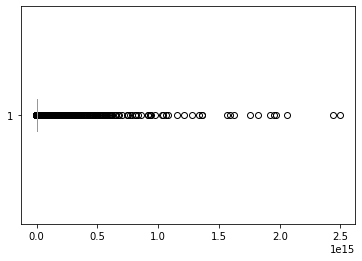

In [7]:
# Plot boxplot of `"ride_length"` to view outliers
plt.boxplot(x = trips['ride_length'], vert = False);

In [8]:
# Create function to remove `"ride_length"` outliers above and below the 95th quantile and 5th quantile respectively
def remove_outliers(df_in, column):
    upper = df_in[column].quantile(0.95)
    lower = df_in[column].quantile(0.05)
    df_out = df_in[(df_in[column] < upper) & (df_in[column] > lower)]
    return df_out

# Use function to clean `trips`
trips = remove_outliers(trips, 'ride_length')

# Check new summary statistics of `"ride_length"`
trips.describe()['ride_length']

count                      4163790
mean     0 days 00:14:17.926685783
std      0 days 00:10:01.363650952
min                0 days 00:02:44
25%                0 days 00:06:50
50%                0 days 00:11:13
75%                0 days 00:18:50
max                0 days 00:50:45
Name: ride_length, dtype: object

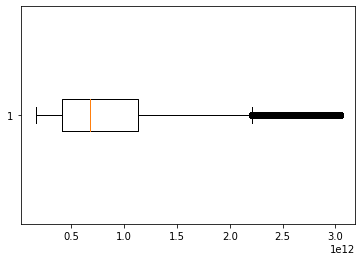

In [9]:
# Plot boxplot of `"ride_length"` to view with most outliers removed
plt.boxplot(x = trips['ride_length'], vert = False);

In [10]:
trips.sort_values('ride_length').head()

ride_id  rideable_type          started_at  \
3388524  67C85DB06BE1A831  electric_bike 2021-10-29 13:13:43   
2783839  99B2CB673D3E4CE3  electric_bike 2021-10-18 17:31:25   
1143687  7DC3F55D1C15A5A7  electric_bike 2021-12-01 09:39:02   
3810247  376E12D8DE098BE4  electric_bike 2022-01-07 19:26:16   
2918603  E9CAD18D3300A919   classic_bike 2022-02-21 15:27:17   

                   ended_at              start_station_name start_station_id  \
3388524 2021-10-29 13:16:27  Southport Ave & Irving Park Rd     TA1309000043   
2783839 2021-10-18 17:34:09             Clark St & Grace St     TA1307000127   
1143687 2021-12-01 09:41:46            Wallace St & 35th St     TA1308000045   
3810247 2022-01-07 19:29:00            Clinton St & Lake St            13021   
2918603 2022-02-21 15:30:01             Ellis Ave & 60th St     KA1503000014   

                     end_station_name end_station_id  start_lat  start_lng  \
3388524  Southport Ave & Waveland Ave          13235  41.954196 -87.664357   
2783839         Clark St & Newport St            632  41.950938 -87.659188   
1143687       Wentworth Ave & 33rd St          15445  41.834455 -87.640977   
3810247           Canal St & Adams St          13011  41.885591 -87.641649   
2918603           Ellis Ave & 58th St   TA1309000011  41.785097 -87.601073   

           end_lat    end_lng member_casual     ride_length     month  \
3388524  41.948303 -87.664105        member 0 days 00:02:44   October   
2783839  41.944590 -87.654741        member 0 days 00:02:44   October   
1143687  41.834548 -87.631741        member 0 days 00:02:44  December   
3810247  41.879255 -87.639904        member 0 days 00:02:44   January   
2918603  41.788746 -87.601334        member 0 days 00:02:44  February   

        day_of_week  distance_km  
3388524      Friday        0.655  
2783839      Monday        0.795  
1143687   Wednesday        0.765  
3810247      Friday        0.719  
2918603      Monday        0.406

In [11]:
# Inspect `'rideable_type'` & `'member_casual'` types
print(
trips.rideable_type.unique(),
trips.member_casual.unique()
)

['docked_bike' 'electric_bike' 'classic_bike'] ['casual' 'member']


**** Analysis

In [12]:
# Aggregrate statistics for `'ride_length'`
trips['ride_length'].agg(['mean', 'median', 'max', 'min'])

mean     0 days 00:14:17.926685783
median             0 days 00:11:13
max                0 days 00:50:45
min                0 days 00:02:44
Name: ride_length, dtype: timedelta64[ns]

In [13]:
# Compare between member_casual
trips.groupby('member_casual')['ride_length'].agg(['mean', 'median', 'max', 'min'])

mean          median             max  \
member_casual                                                             
casual        0 days 00:16:59.713799871 0 days 00:13:56 0 days 00:50:45   
member        0 days 00:12:27.804324573 0 days 00:09:41 0 days 00:50:45   

                          min  
member_casual                  
casual        0 days 00:02:44  
member        0 days 00:02:44

In [14]:
# 
pd.pivot_table(trips, values = 'ride_length', index = 'day_of_week', columns = 'member_casual', margins = True, sort = True)

member_casual                    casual                    member  \
day_of_week                                                         
Friday        0 days 00:16:22.279417264 0 days 00:12:11.729209027   
Monday        0 days 00:17:03.057069411 0 days 00:12:10.146753470   
Saturday      0 days 00:18:22.041695536 0 days 00:13:43.032899162   
Sunday        0 days 00:18:29.722690946 0 days 00:13:48.426302235   
Thursday      0 days 00:15:40.877659826 0 days 00:12:02.691984486   
Tuesday       0 days 00:15:28.238881836 0 days 00:11:47.396052513   
Wednesday     0 days 00:15:28.895667833 0 days 00:11:56.417400787   
All           0 days 00:16:59.713799871 0 days 00:12:27.804324573   

member_casual                       All  
day_of_week                              
Friday        0 days 00:13:53.981530116  
Monday        0 days 00:13:55.436570687  
Saturday      0 days 00:16:08.793321858  
Sunday        0 days 00:16:12.797956392  
Thursday      0 days 00:13:20.068002516  
Tuesday       0 days 00:12:57.591409450  
Wednesday     0 days 00:13:05.705188613  
All           0 days 00:14:17.926685783

In [15]:
start_station = trips.start_station_name.value_counts().head(10)
end_station = trips.end_station_name.value_counts().head(10)
print(start_station)
print(end_station)

Streeter Dr & Grand Ave               61901
DuSable Lake Shore Dr & North Blvd    38799
Wells St & Concord Ln                 37125
Clark St & Elm St                     34056
Michigan Ave & Oak St                 34054
DuSable Lake Shore Dr & Monroe St     32839
Wells St & Elm St                     31897
Kingsbury St & Kinzie St              31424
Theater on the Lake                   30766
Millennium Park                       28091
Name: start_station_name, dtype: int64
Streeter Dr & Grand Ave               61511
DuSable Lake Shore Dr & North Blvd    42351
Wells St & Concord Ln                 37363
Michigan Ave & Oak St                 34031
Clark St & Elm St                     33469
Wells St & Elm St                     31450
DuSable Lake Shore Dr & Monroe St     31396
Theater on the Lake                   30172
Kingsbury St & Kinzie St              29997
Millennium Park                       29379
Name: end_station_name, dtype: int64


In [16]:
start_station4 = trips.start_station_name.value_counts().head(4)
pop_station = pd.merge(
    trips, start_station4,
    left_on = 'start_station_name', right_index = True, how = 'inner')

qwerty = trips[(trips['start_station_name'] == 'Streeter Dr & Grand Ave') | (trips['start_station_name'] == 'DuSable Lake Shore Dr & North Blvd')]
                
fig = px.scatter_mapbox(
    data_frame= pop_station,
    lat= 'start_lat',
    lon= 'start_lng',
    center={'lat': 41.89, 'lon': -87.61},  # Streeter Dr & Grand Ave
    width=600,
    height=600,
    hover_data=['rideable_type'],
    color = 'member_casual'
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

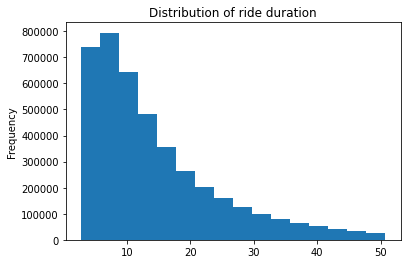

In [17]:
# Plot histogram of `'ride_length'` in minutes
(
(trips['ride_length']
.astype('timedelta64[s]') /60)
.plot(kind = 'hist', xlabel = 'Ride duration [minutes]', title = 'Distribution of ride duration', bins = 16)
);